# 2. Reading files


## Load Review Text
Let's load a file where each line contains a review of one kind of product. You can choose the product you like from the `data/text/` folder; I'm going to go with camera reviews.

In [1]:
with open('./data/text/reviews_camera.txt', 'r', encoding='utf-8') as fo:
    reviews = fo.read()

Since the file contains severa reviews, we want to make sure that each review is separate from the other, i.e., the reviews should be in the form of a `list` and **not** a single `string` that has combined all reviews.

In [2]:
type(reviews)

str

Looks like we have indeed done what we should not have done, i.e., read the text as a single string. Let's try that again, but with a different command to read each line in the file separately.

In [3]:
with open('./data/text/reviews_camera.txt', 'r', encoding='utf-8') as fo:
    reviews = fo.readlines()

type(reviews)

list

Excellent. Now we can do things like check how many reviews (i.e., lines in the file) have been loaded, and even print out the first few reviews.

In [4]:
print("Number of reviews loaded: ", len(reviews))
print("------------------------------------")
print("First 3 reviews:")
for review in reviews[0:3]:
    print(review)

Number of reviews loaded:  2139
------------------------------------
First 3 reviews:
It doesn't work after less than a month. The contacts on the connection are cheap. Don't waste your money.

Doesn't work and tried contacting via email based off of the card that came with the item. Email does not work.

returned . it would not recognize internet . standing next to netgear router says internet not available . tried for several hours and finally gave up . reset many times .



## Counting Words
Most text analysis approaches start at the same point: identifying meaningful chunks of text, and then counting them. For our purpose, words provide a good balance between size and 'meaningful-ness', so we need to identify the words and count them. Let's start with the most basic approach.

### Strategy 1: The Spaces between Words
Let's try the basic strategy of separating words by the spaces in between them.

In [5]:
def get_words(reviews):
    review_words_list = []
    for review in reviews:
        words = review.lower().split()
        review_words_list.append(words)
    return review_words_list



The next few steps (counting words and graphically displaying the counts) will be pretty much the same for all other strategies, so let's write functions for them.

**NOTE:** In the next few steps we will be using existing libraries as we discussed in the workshop session, so we will import them as needed.

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def count_words(review_words_list):
    all_words = []
    for review_words in review_words_list :
        all_words.extend(review_words)
    unique_words = list(set(all_words))
    word_counts = [all_words.count(w) for w in unique_words]
    counts_df = pd.DataFrame({'word' : unique_words, 'count' : word_counts})
    return counts_df

def plot_words(df, max_words=40):
    df = df.sort_values(by=['count'], ascending=False)
    df = df[0:max_words]
    plt.figure(figsize=(4,int(max_words/5)), dpi=100)
    g=sns.barplot(y='word', x='count', data=df, color='gray')
    

In [7]:
review_words_list = get_words(reviews)

word_counts_df = count_words(review_words_list)
# all_w = [word for review_words in review_words_list for word in review_words]
# [item for row in matrix for item in row]

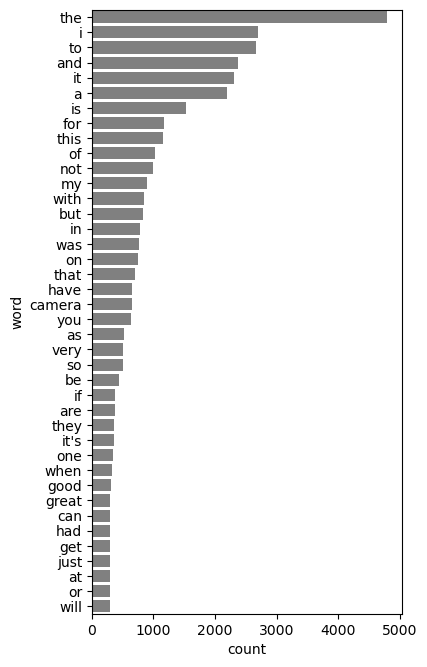

In [8]:
plot_words(word_counts_df, max_words=40)

What do you notice in the plot? Do you think the most frequently-occurring words help you understand the reviews in any way?

### Strategy 2: tokenization
Let's start exploring slightly more sophisticated ways to identify words, namely "tokenization", which is a fancy term for breaking up a string of text into words and punctuation. For more on the nuances of tokenization, see [Chapter 3 of the NLTK book](https://www.nltk.org/book/ch03.html).

In [9]:
from nltk.tokenize import word_tokenize

def get_words_tokenized(reviews):
    review_words_list = []
    for review in reviews:
        words = word_tokenize(review.lower())
        review_words_list.append(words)
    return review_words_list

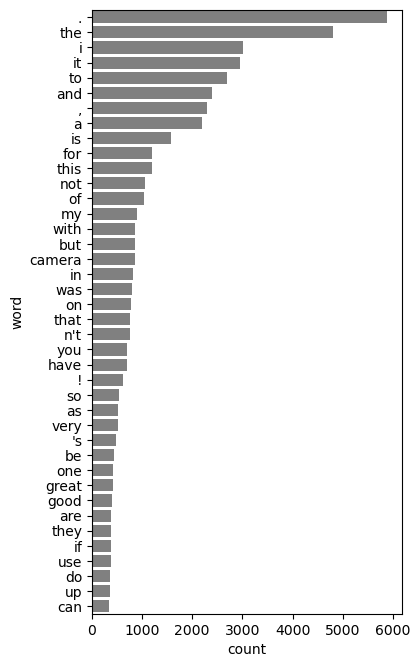

In [10]:
review_words_list = get_words_tokenized(reviews)
word_counts_df = count_words(review_words_list)
plot_words(word_counts_df, max_words=40)

Do you see a difference in the two plots?

### Strategy 2.5 : Remove punctuation

In [11]:
import string
punctuations = string.punctuation + "’"

def get_words_tokenized_nopunct(reviews, puncts=punctuations):
    review_words_list = []
    for review in reviews:
        words = word_tokenize(review.lower())
        words_no_punct = [word for word in words if not word in punctuations]
        review_words_list.append(words_no_punct)
    return review_words_list



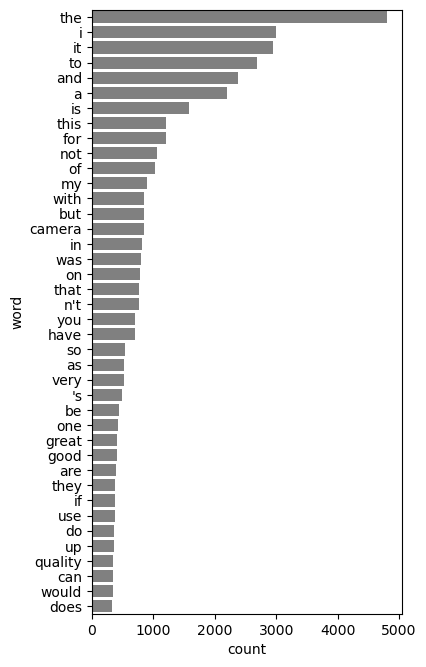

In [12]:
review_words_list = get_words_tokenized_nopunct(reviews)
word_counts_df = count_words(review_words_list)
plot_words(word_counts_df, max_words=40)

### Strategy 3: Disregard Stop Words
In the above plots, we have several occurrences of articles, prepositions, and pronouns (collectively termed "stop words" in natural language processing), which are not quite as interesting in identifying context as nouns, verbs, adjectives, and adverbs. Let's try and remove these.

In [13]:
import nltk
from nltk.corpus import stopwords
# nltk.download('stopwords') # uncomment and run this line the first time you run this code.
stop_words = set(stopwords.words('english'))

def get_words_tokenized_nopunct_nostop(reviews, puncts=punctuations, stop_w=stop_words):
    review_words_list = []
    for review in reviews:
        words = word_tokenize(review.lower())
        words_no_punct = [word for word in words if (not word in punctuations) and (not word in stop_w)]
        review_words_list.append(words_no_punct)
    return review_words_list


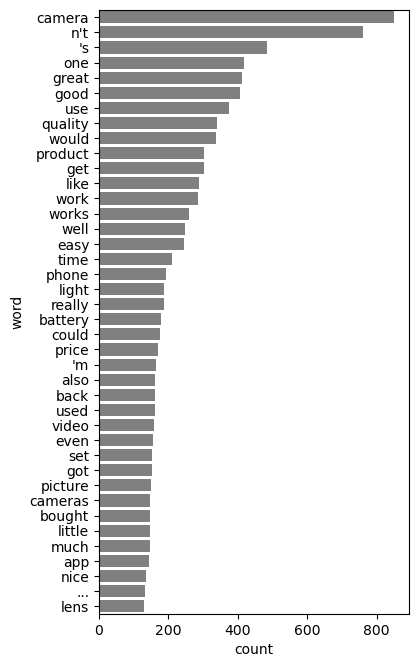

In [14]:
review_words_list = get_words_tokenized_nopunct_nostop(reviews)
word_counts_df = count_words(review_words_list)
plot_words(word_counts_df, max_words=40)

This is much better. What do you notice in your own reviews?

## Morphology
Should `work` and `works` be treated differently or in the same way? Words like `gone`, `went`, `going` etc. are inflected forms of the base verb `go`. In natural language processing, substituting inflected forms with the base form is called **lemmatization** . Note that lemmatization is not always helpful and it really depends on what information you think is relevant for your analysis.

In [15]:
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk import word_tokenize
from nltk.corpus import wordnet

lemmatizer = WordNetLemmatizer()

review_words_list = get_words_tokenized_nopunct_nostop(reviews)
review_words_list_lemmatized = []



def get_lemma(word):
    
    # pos_refs = {'n': ['NN', 'NNS', 'NNP', 'NNPS'],
    #            'v': ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'],
    #            'r': ['RB', 'RBR', 'RBS'],
    #            'a': ['JJ', 'JJR', 'JJS']}

    pos_label = (pos_tag(word_tokenize(word))[0][1][0]).lower()
    if pos_label == 'j': pos_label = 'a'    # 'j' <--> 'a' reassignment

#     if pos_label in ['r']:  # For adverbs it's a bit different
#         lemma = wordnet.synset(word+'.r.1').lemmas()[0].pertainyms()[0].name()
    if pos_label in ['a', 's', 'v']: # For adjectives and verbs
        lemma = lemmatizer.lemmatize(word, pos=pos_label)
    else:   # For nouns and everything else as it is the default kwarg
        lemma = lemmatizer.lemmatize(word)
    return lemma
    
    
def get_lemmatized_review_text(review_words_list):
    review_words_list_lemmatized = []
    for review_words in review_words_list :
        lemmatized_tokens = [get_lemma(word) for word in review_words]
        review_words_list_lemmatized.append(lemmatized_tokens)
    return review_words_list_lemmatized


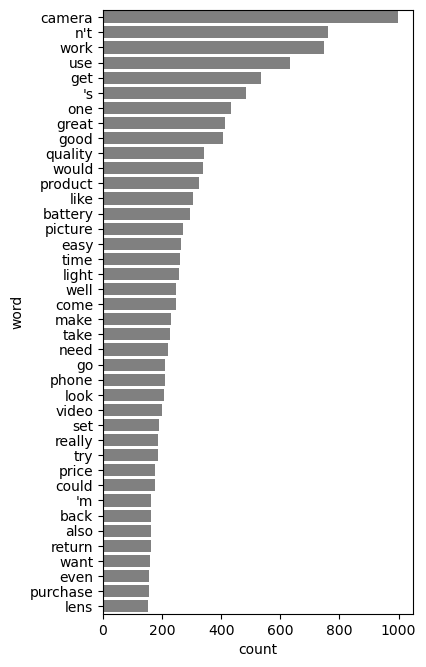

In [16]:
review_words_list_lemmatized = get_lemmatized_review_text(review_words_list)
word_counts_df = count_words(review_words_list_lemmatized)
plot_words(word_counts_df, max_words=40)

## Examining Contexts
Now that you know what words are most frequent in your text, how do you know the context in which they are being used? We use Keyword in Context (KWIC) or 'text concordance' to examine the contexts in which a word is used.

In [17]:
from nltk.text import Text
from nltk.corpus import gutenberg

full_path_to_data_folder = '/Users/schandrasegara/programming/text-analysis-ide-academy/'
## NOTE: substitute above string with the path you find in your system, starting with the root directory.

text = Text(gutenberg.words( full_path_to_data_folder + 'data/reviews_camera.txt'))

In [18]:
text.concordance('return', width=105, lines=25)

Displaying 25 of 84 matches:
ect email or amazon email ! Just went to ask for return and see there was a closed return window ! Will 
ent to ask for return and see there was a closed return window ! Will take up with credit card and amazo
one . Update Will not reorder . They have had my return since wednesday it is now sunday and seller has 
it is now sunday and seller has not processed my return . Only turns on when connected to charger .. nee
 is I didn ' t use it in the first month and the return window is closed . So it ' s gonna end up in gar
product DOES NOT work for me !! Is it to late to return it ? The product was easy too install but within
e still wearing the bag . Unfortunately I had to return it because the fabric started to pull away from 
dered 3 of them & Loved the concept , but had to return all 3 as the odor was overwhelming and could not
 of other issues . I ' m barely under the 30 day return . I ' m sending this crap back Do not buy , it o
d experience !! I wouldn '

## Diving a little deeper
Let's look a little deeper into other aspects of the reviews. Do long and short reviews talk about the same aspects of the products?

In [19]:
import statistics

review_words_list = get_words_tokenized_nopunct(reviews)
review_lengths = [len(review_words) for review_words in review_words_list]
mean_review_length = round(statistics.mean(review_lengths))
median_review_length = statistics.median(review_lengths)

print(f'{len(reviews)} reviews loaded with an average review length of {mean_review_length} words\n'+
      f'and a median of {median_review_length} words')

2139 reviews loaded with an average review length of 43 words
and a median of 29 words


In [20]:
print(review_words_list[:3])

[['it', 'does', "n't", 'work', 'after', 'less', 'than', 'a', 'month', 'the', 'contacts', 'on', 'the', 'connection', 'are', 'cheap', 'do', "n't", 'waste', 'your', 'money'], ['does', "n't", 'work', 'and', 'tried', 'contacting', 'via', 'email', 'based', 'off', 'of', 'the', 'card', 'that', 'came', 'with', 'the', 'item', 'email', 'does', 'not', 'work'], ['returned', 'it', 'would', 'not', 'recognize', 'internet', 'standing', 'next', 'to', 'netgear', 'router', 'says', 'internet', 'not', 'available', 'tried', 'for', 'several', 'hours', 'and', 'finally', 'gave', 'up', 'reset', 'many', 'times']]


Text(0.5, 0, 'Review length in words')

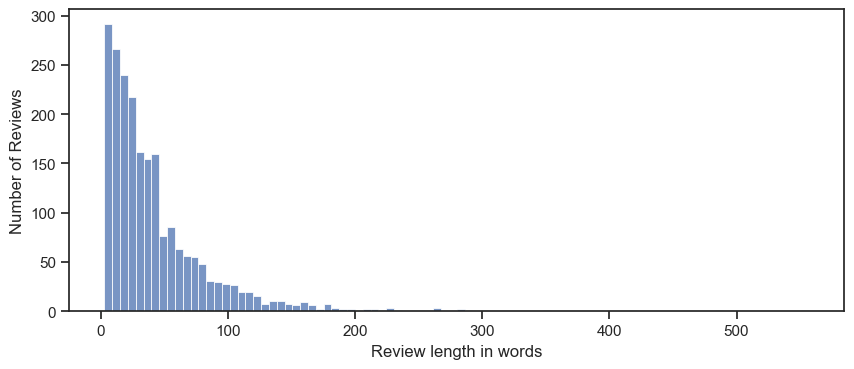

In [21]:
sns.set_theme('notebook')
sns.set_style('ticks')
plt.figure(figsize=(10,4), dpi=100)
g = sns.histplot(review_lengths)
g.set_ylabel('Number of Reviews')
g.set_xlabel('Review length in words')

In [22]:
df = pd.DataFrame({'review' : reviews, 'length_in_words' : review_lengths})
df.sample(5)

,review,length_in_words
1045,I was very excited to order this backdrop. But...,54
1251,"I love the ease of printing my own photos, but...",24
537,The lens had really blurring corner resolution...,34
1343,"Came as a pair, these get lost frequently and ...",44
1165,2.5 actually. May be I am doing something wron...,63


In [23]:
long_reviews_df = df[df['length_in_words'] > mean_review_length]
short_reviews_df = df[df['length_in_words'] <= mean_review_length]
print(f'{long_reviews_df.shape[0]} of {df.shape[0]} reviews ({long_reviews_df.shape[0]/df.shape[0] :.0%}) are of above-average length.')

709 of 2139 reviews (33%) are of above-average length.


## Exercise
Compare longer reviews and shorter reviews using the technique we covered earlier in this notebook. Do they talk about similar content?